In [1]:
!nvidia-smi

Fri Apr 26 06:04:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from IPython.display import Image

In [3]:
!git clone https://github.com/MuhammadMoinFaisal/YOLOv8-DeepSORT-Object-Tracking.git

Cloning into 'YOLOv8-DeepSORT-Object-Tracking'...
remote: Enumerating objects: 403, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 403 (delta 21), reused 19 (delta 19), pack-reused 370
Receiving objects: 100% (403/403), 77.99 MiB | 35.43 MiB/s, done.
Resolving deltas: 100% (206/206), done.


In [4]:
!pwd

/content


In [5]:
%cd /content/YOLOv8-DeepSORT-Object-Tracking

/content/YOLOv8-DeepSORT-Object-Tracking


In [7]:
!pip install -e '.[dev]'

Obtaining file:///content/YOLOv8-DeepSORT-Object-Tracking
  Preparing metadata (setup.py) ... done
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.3
    Uninstalling ultralytics-8.0.3:
      Successfully uninstalled ultralytics-8.0.3
  Running setup.py develop for ultralytics


In [8]:
%cd /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


In [10]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kG8jzBWyDHC4tZHkHhWH")
project = rf.workspace("alaikal-fatoni-15dhi").project("basket11")
version = project.version(1)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


In [11]:
!gdown "https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t
To: /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/deep_sort_pytorch.zip
100% 43.1M/43.1M [00:01<00:00, 37.7MB/s]


In [12]:
!unzip deep_sort_pytorch.zip

Archive:  deep_sort_pytorch.zip
  inflating: deep_sort_pytorch/.gitignore  
   creating: deep_sort_pytorch/configs/
  inflating: deep_sort_pytorch/configs/deep_sort.yaml  
   creating: deep_sort_pytorch/deep_sort/
  inflating: deep_sort_pytorch/deep_sort/__init__.py  
   creating: deep_sort_pytorch/deep_sort/__pycache__/
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-38.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-38.pyc  
   creating: deep_sort_pytorch/deep_sort/deep/
 extracting: deep_sort_pytorch/deep_sort/deep/__init__.py  
   creating: deep_sort_pytorch/deep_sort/deep/__pycache__/
  inflating: deep_sort_pytorch/d

In [13]:
HOME = '/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect'

In [14]:
%cd {HOME}

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


In [15]:
%cd {dataset.location}

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/basket11-1


In [16]:
%cd {HOME}

!python train.py model=yolov8l.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect
100% 83.7M/83.7M [00:00<00:00, 227MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/basket11-1/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, in

In [17]:
!ls /content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train

args.yaml					    R_curve.png		train_batch641.jpg
confusion_matrix.png				    results.csv		train_batch642.jpg
events.out.tfevents.1714111816.b6ab58cd6b5f.2417.0  results.png		val_batch0_labels.jpg
F1_curve.png					    train_batch0.jpg	val_batch0_pred.jpg
P_curve.png					    train_batch1.jpg	val_batch1_labels.jpg
PR_curve.png					    train_batch2.jpg	val_batch1_pred.jpg
predictions.json				    train_batch640.jpg	weights


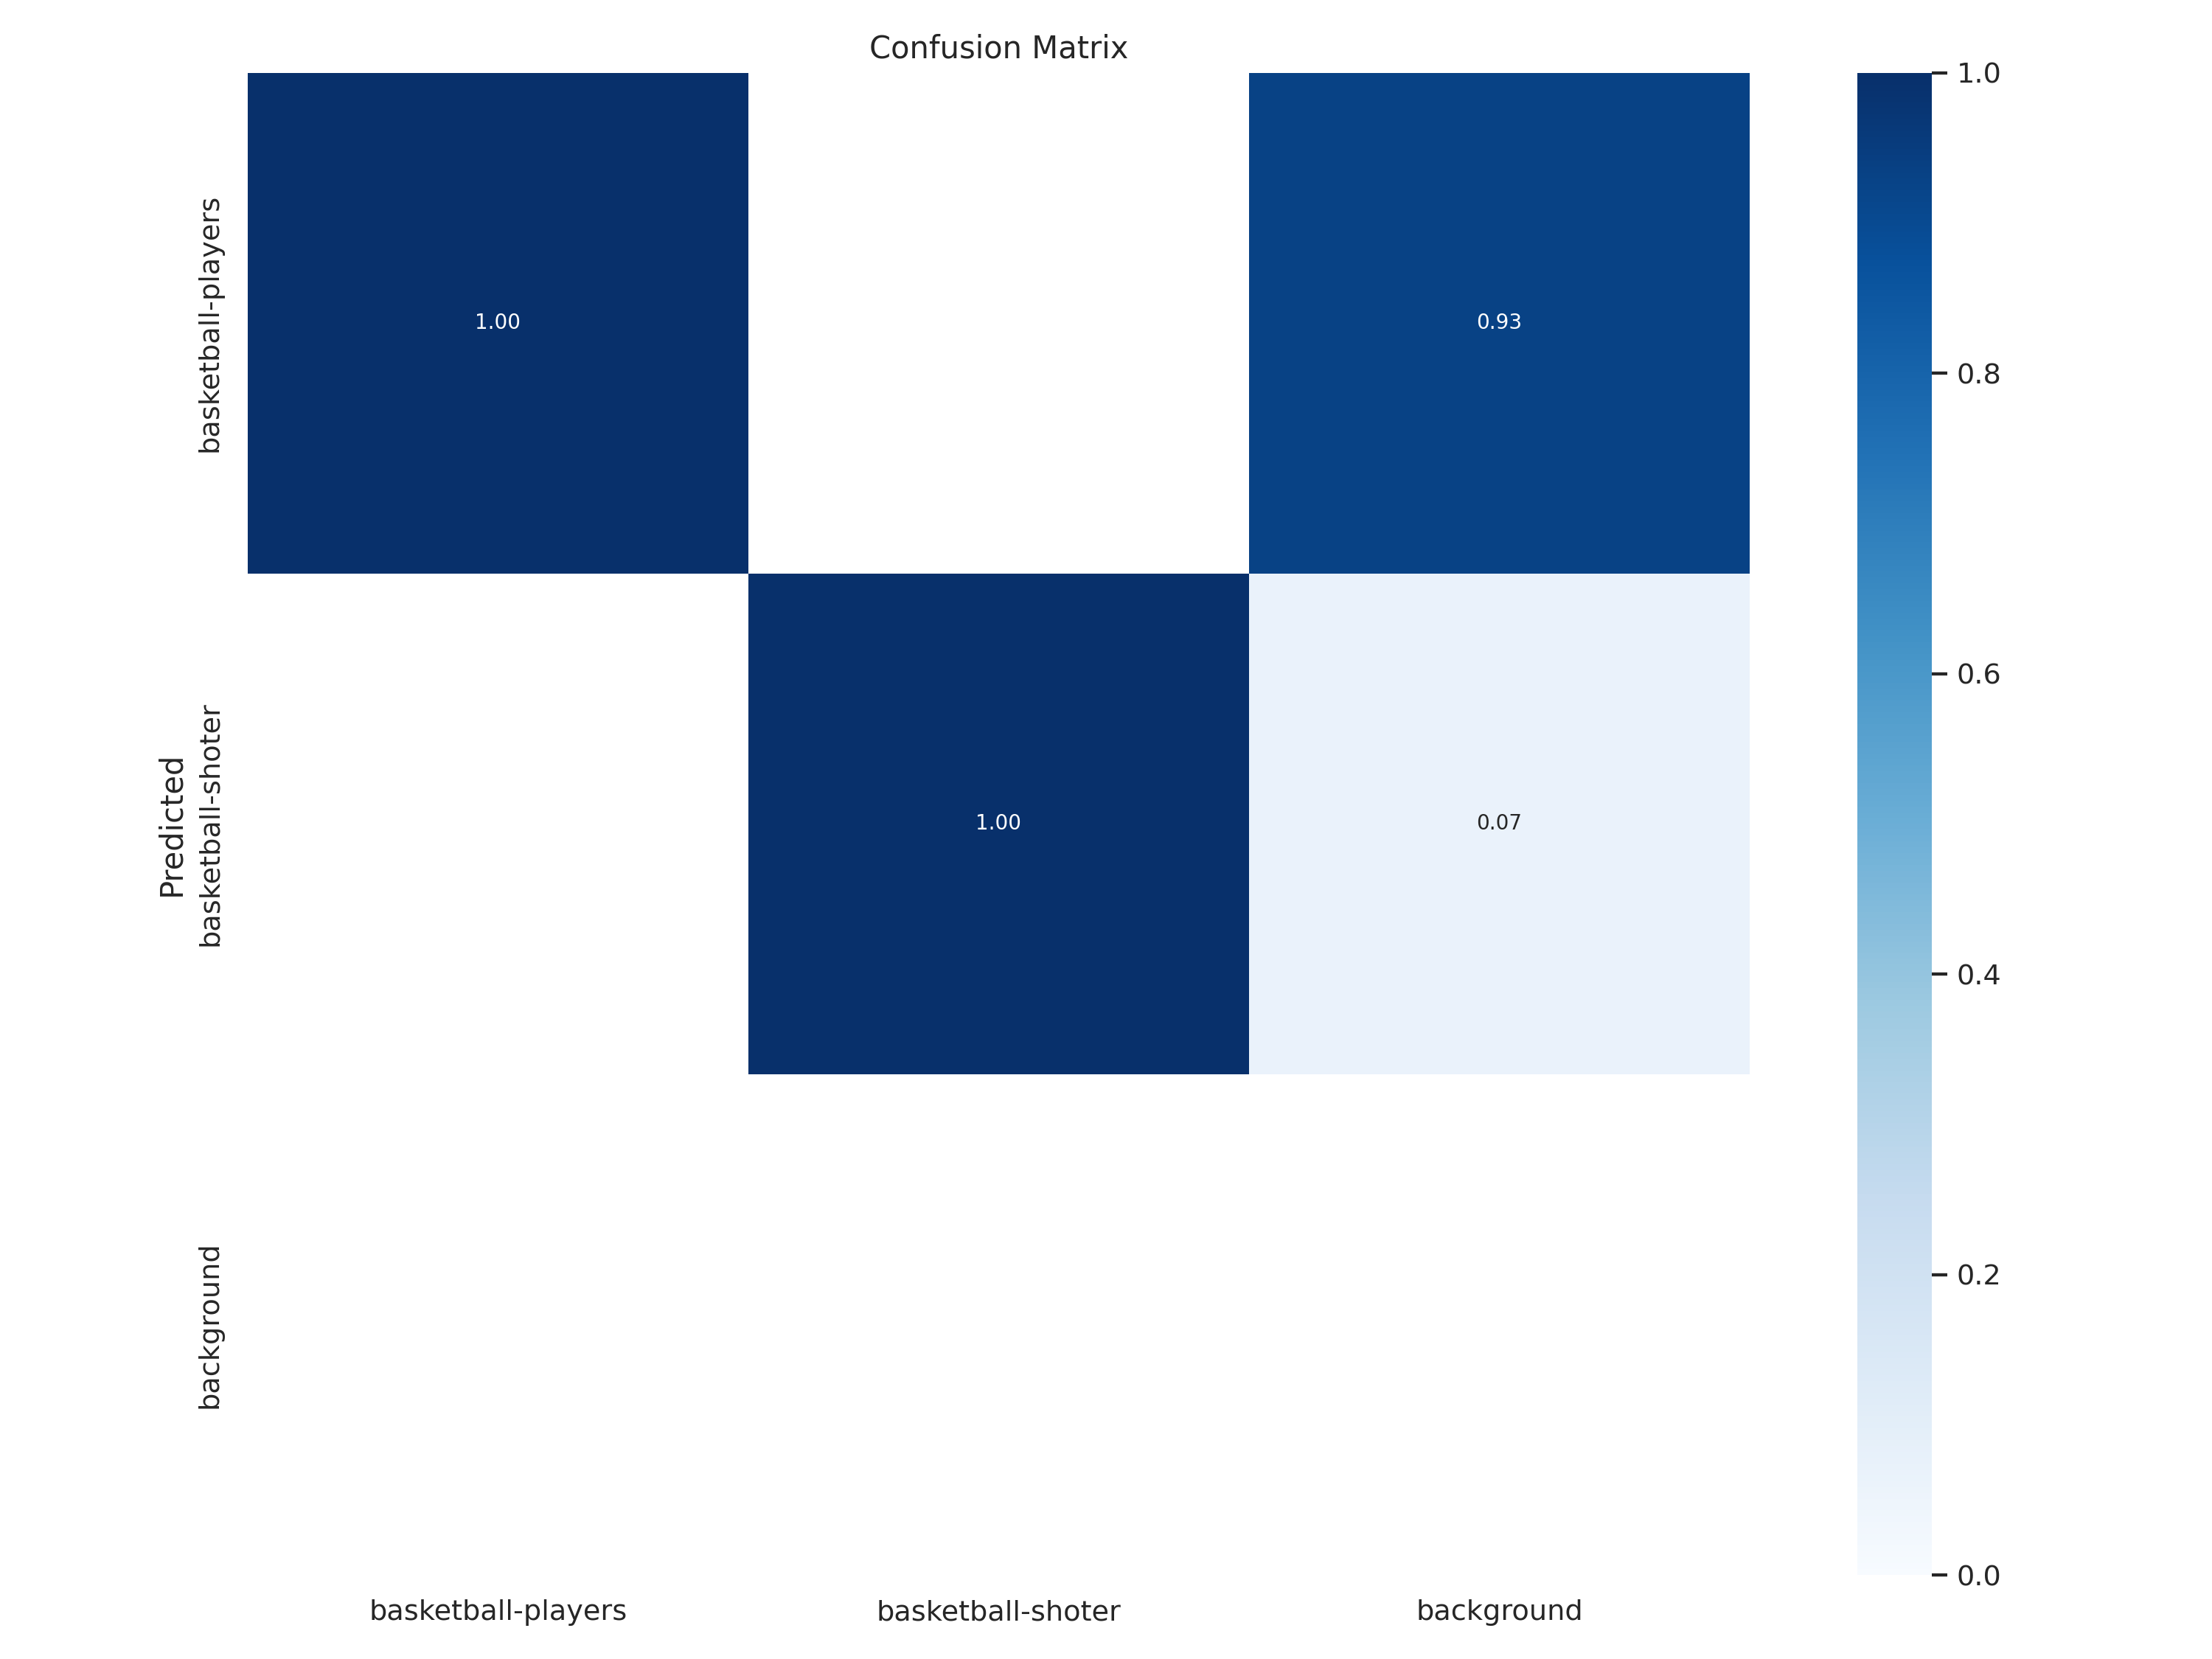

In [ ]:
Image(filename = '/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train/confusion_matrix.png')

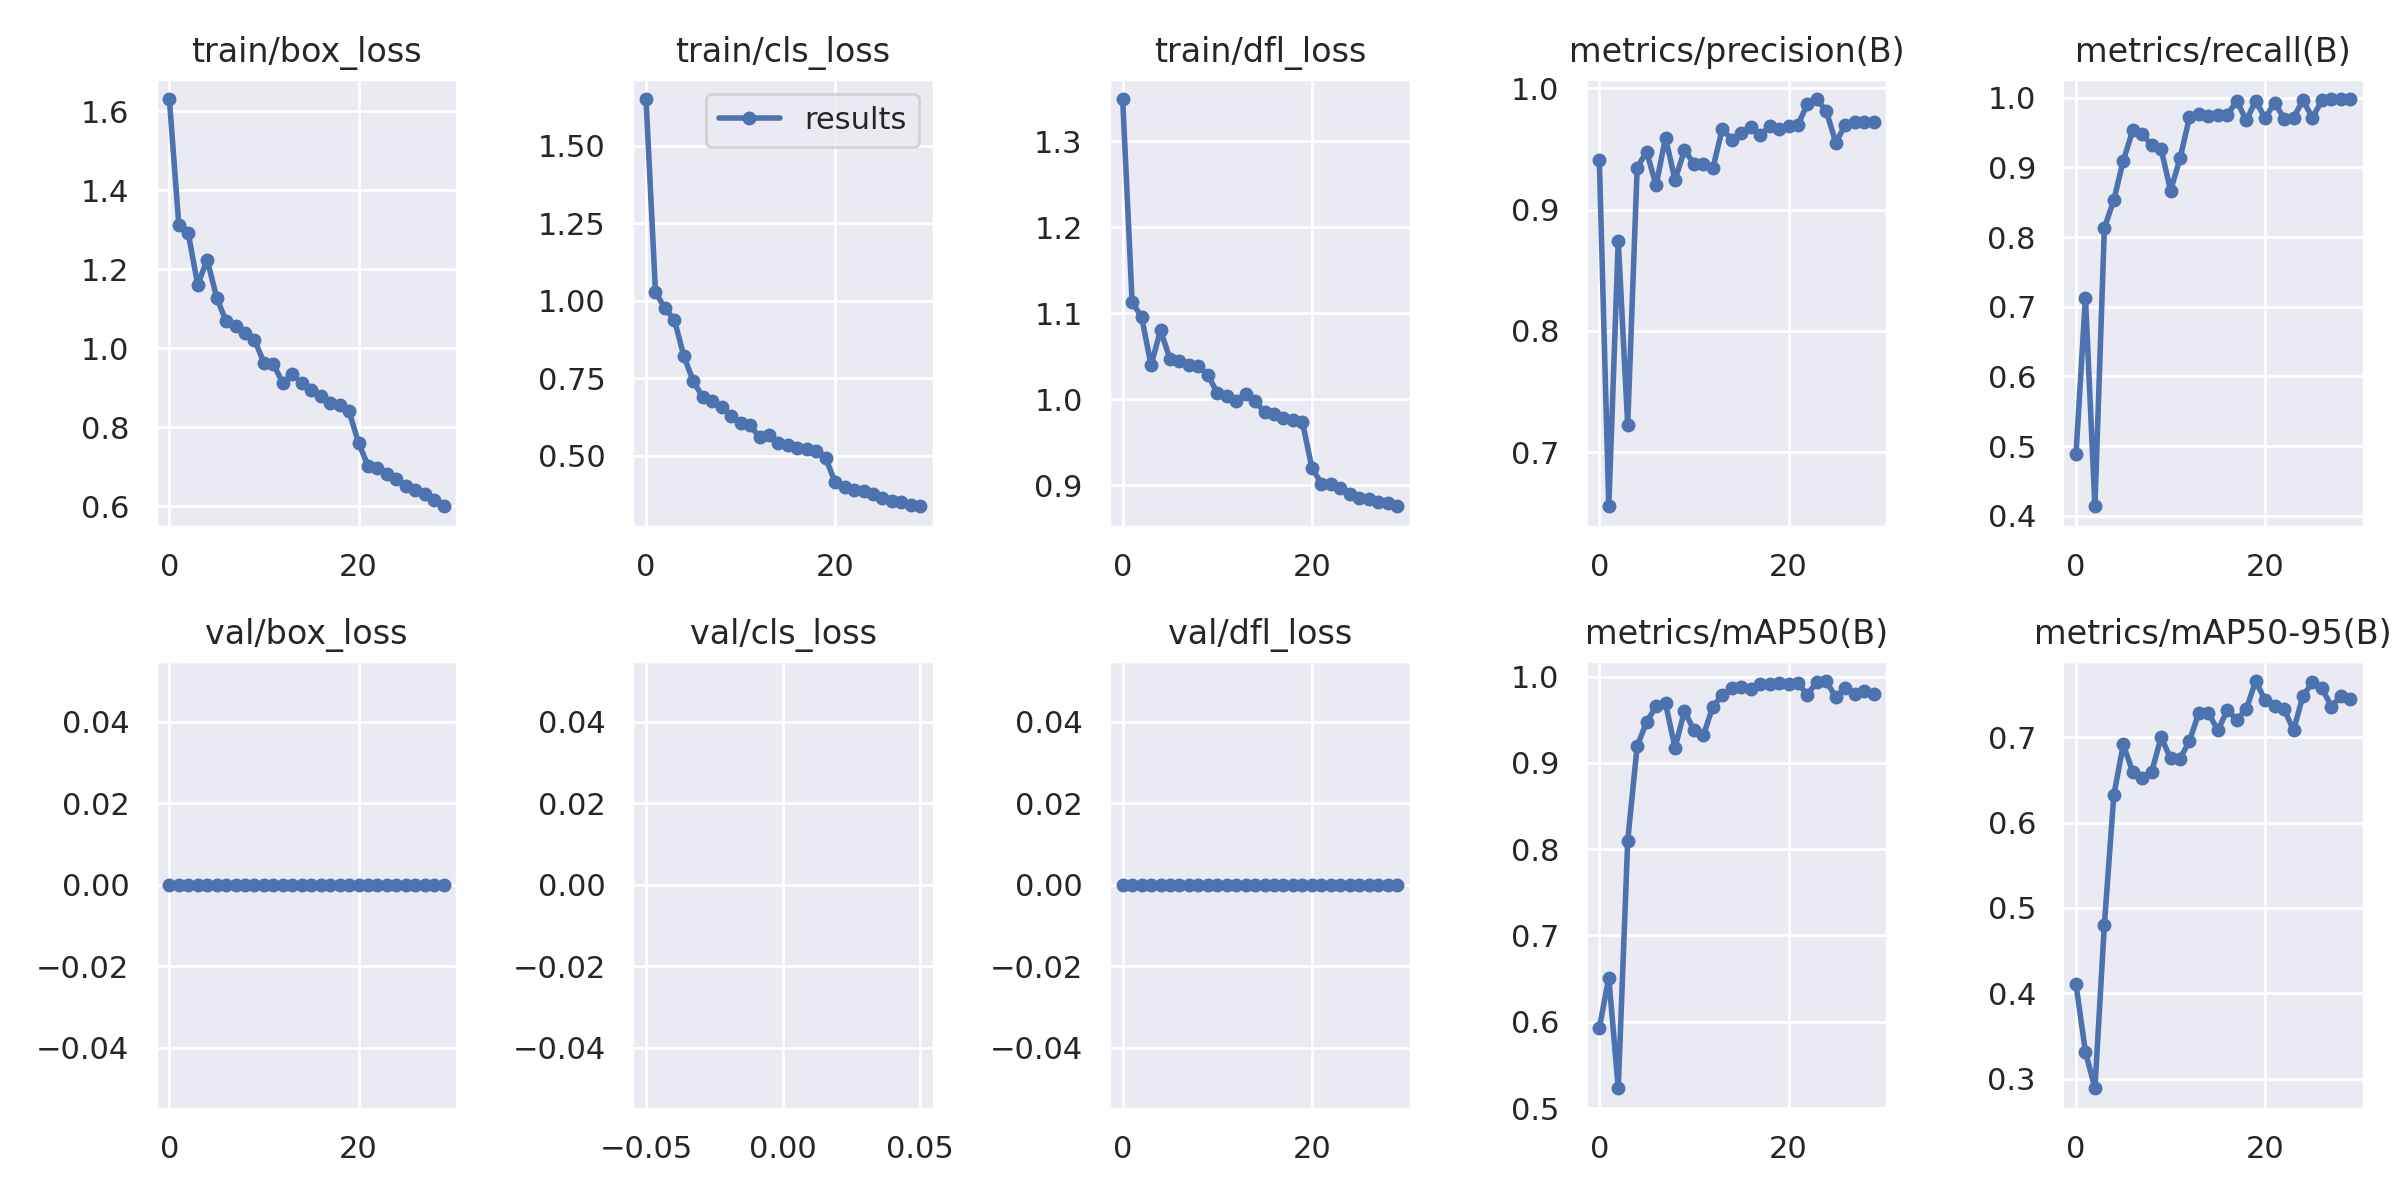

In [ ]:
Image(filename = r'/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train/results.png', width = 600)

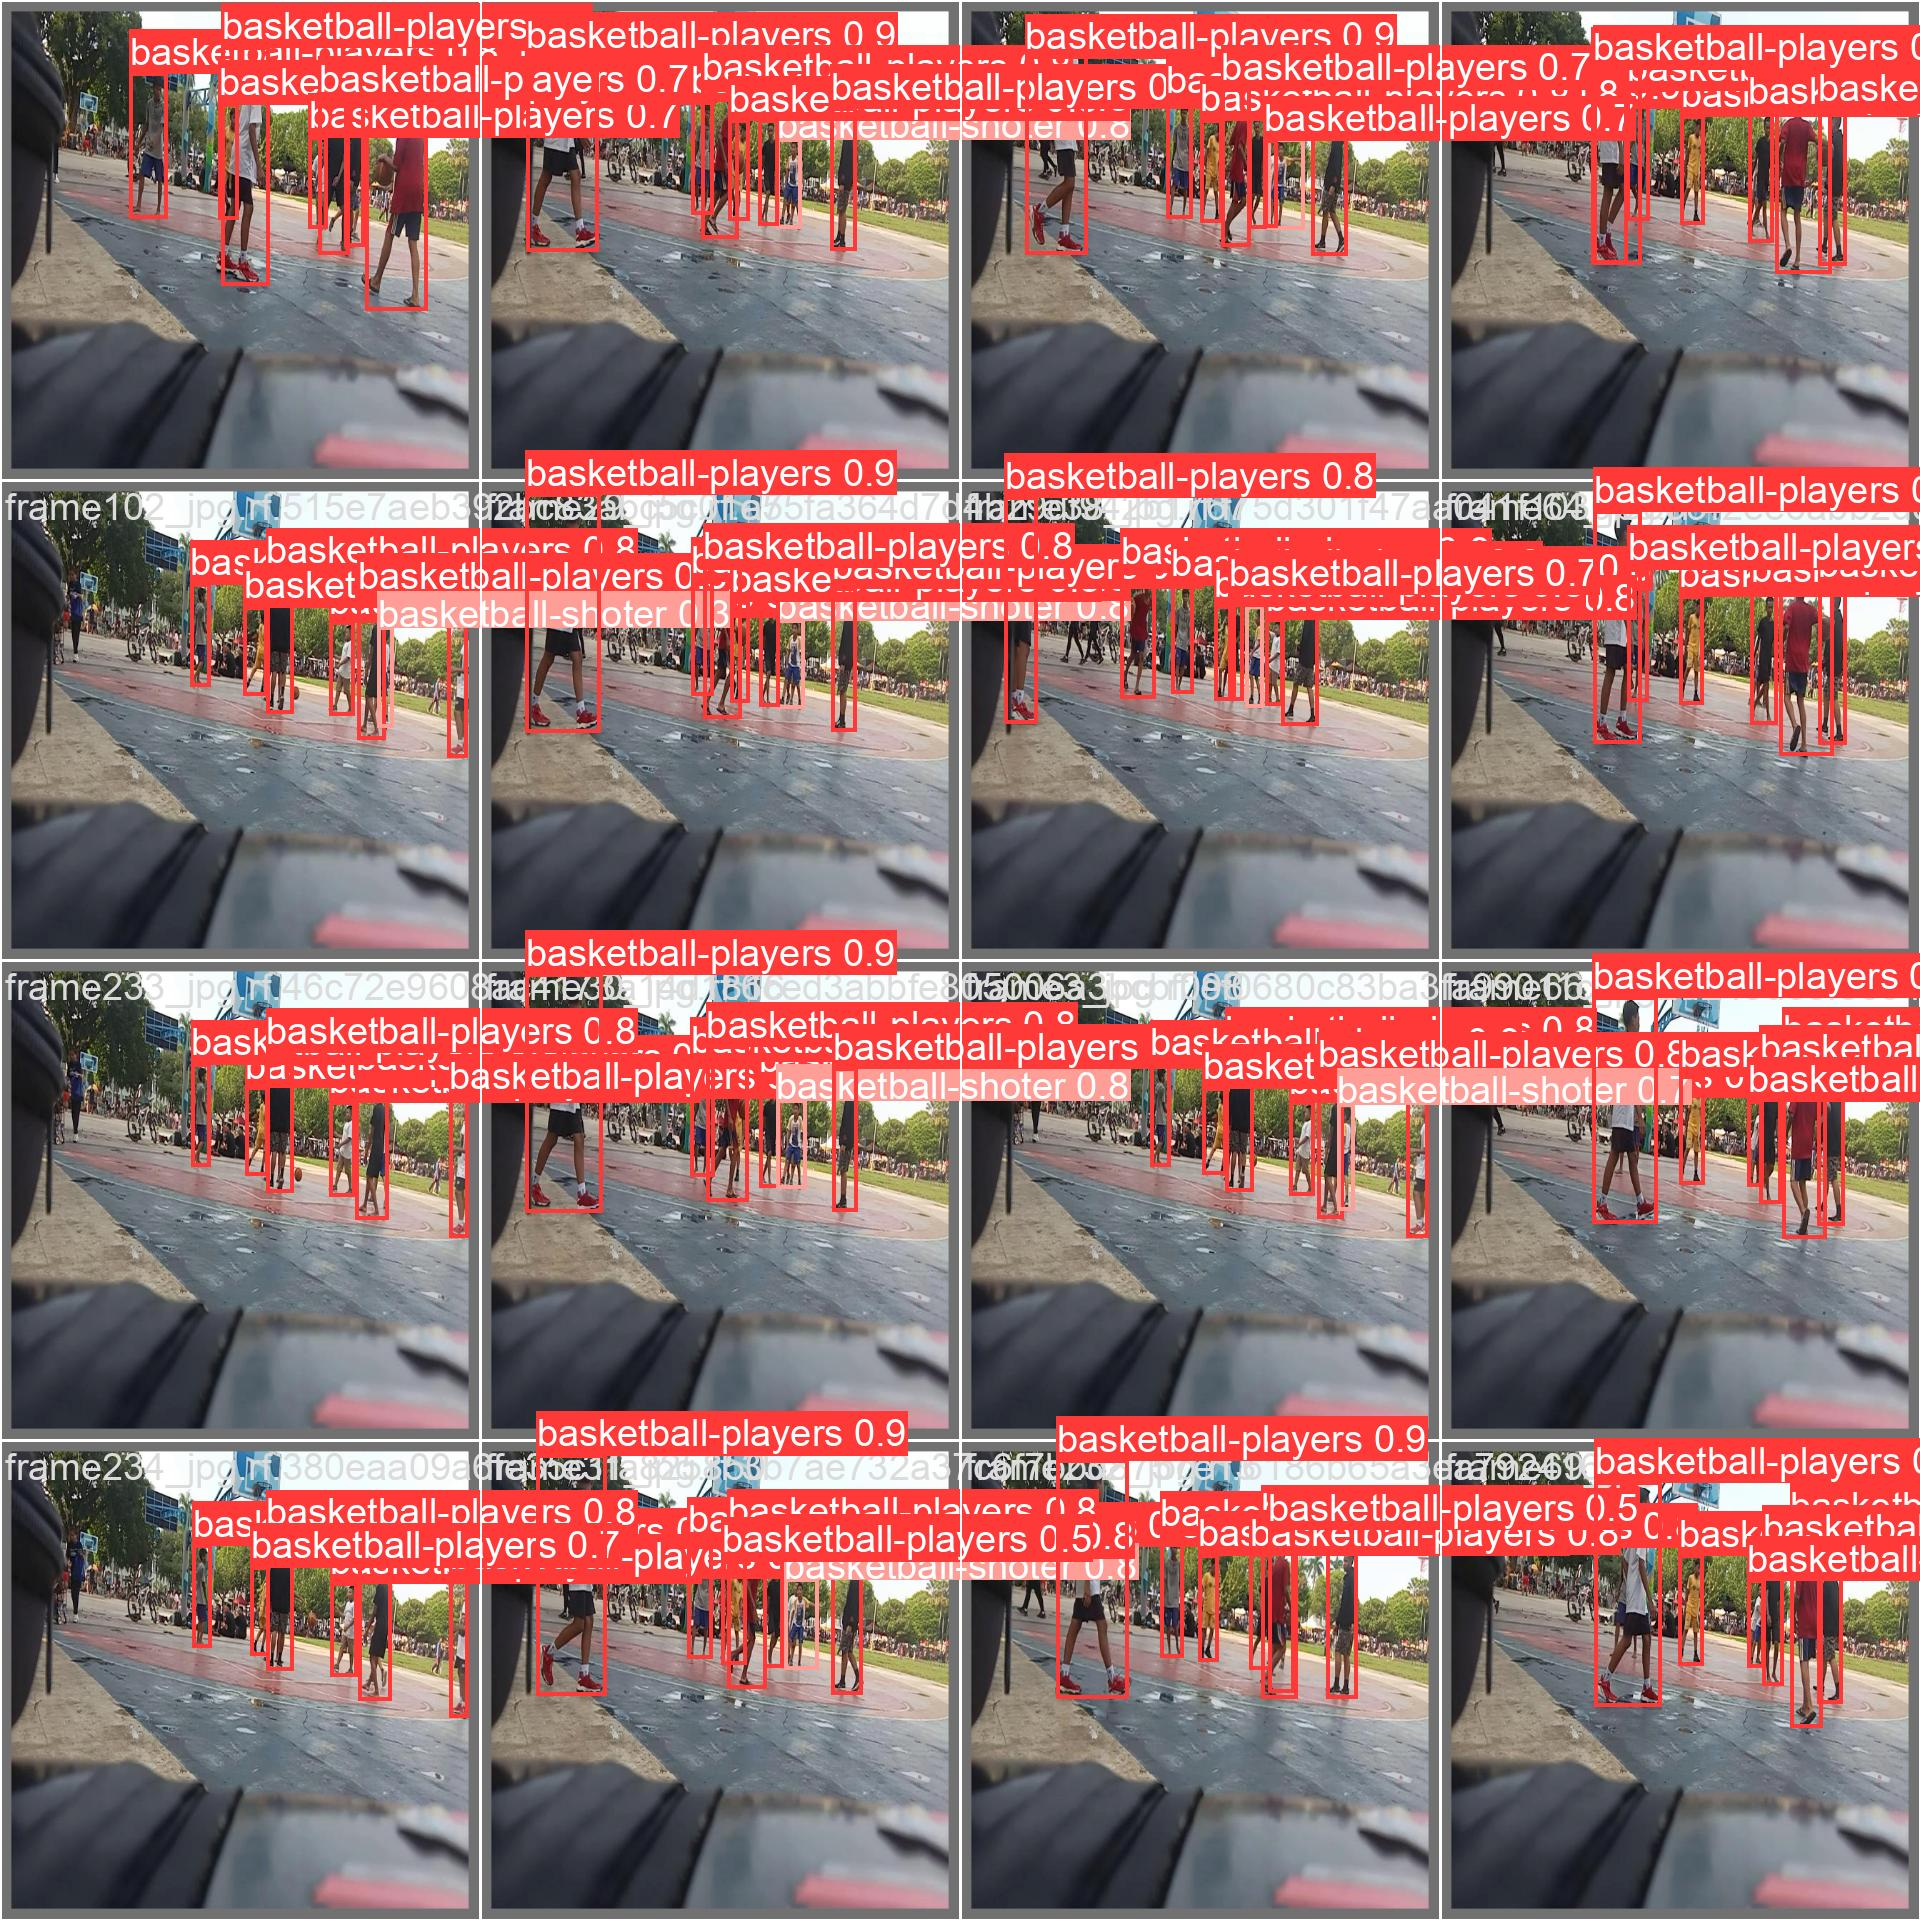

In [ ]:
Image(filename = r'/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train/val_batch0_pred.jpg', width =600)

In [ ]:
%cd {HOME}


/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


In [ ]:
!gdown "https://drive.google.com/uc?id=1VBAZtJ5uJMEsnyya_d0yMP6efBRQ8IX-&confirm=t"


Downloading...
From: https://drive.google.com/uc?id=1VBAZtJ5uJMEsnyya_d0yMP6efBRQ8IX-&confirm=t
To: /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/best.pt
100% 87.7M/87.7M [00:00<00:00, 90.8MB/s]


In [18]:
!pwd

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


In [19]:
!python val.py model='/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train/weights/best.pt' data={dataset.location}/data.yaml

2024-04-26 06:28:30.068091: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-26 06:28:30.068145: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-26 06:28:30.069654: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-26 06:28:31.380311: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.3 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/YOLOv8-DeepSORT-Object-Tracking/ultralyt

In [22]:
!python predict.py model='/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train/weights/best.pt' source='ardan adjie.mp4'

[2024-04-26 06:29:57,645][root.tracker][INFO] - Loading weights from deep_sort_pytorch/deep_sort/deep/checkpoint/ckpt.t7... Done!
2024-04-26 06:29:58.012195: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-26 06:29:58.012241: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-26 06:29:58.013567: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-26 06:29:59.224854: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.3 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model s

In [21]:
!pip install numpy==1.23.5

In [ ]:
!pip install numpy --pre torch torchvision torchaudio --force-reinstall --index-url https://download.pytorch.org/whl/nightly/cu118

Looking in indexes: https://download.pytorch.org/whl/nightly/cu118
  Using cached https://download.pytorch.org/whl/nightly/numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached https://download.pytorch.org/whl/nightly/cu118/torch-2.4.0.dev20240424%2Bcu118-cp310-cp310-linux_x86_64.whl (854.8 MB)
  Using cached https://download.pytorch.org/whl/nightly/cu118/torchvision-0.19.0.dev20240424%2Bcu118-cp310-cp310-linux_x86_64.whl (6.4 MB)
  Using cached https://download.pytorch.org/whl/nightly/cu118/torchaudio-2.2.0.dev20240424%2Bcu118-cp310-cp310-linux_x86_64.whl (3.3 MB)
  Using cached https://download.pytorch.org/whl/nightly/filelock-3.13.1-py3-none-any.whl (11 kB)
  Using cached https://download.pytorch.org/whl/nightly/typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Using cached https://download.pytorch.org/whl/nightly/sympy-1.12-py3-none-any.whl (5.7 MB)
  Using cached https://download.pytorch.org/whl/nightly/networkx-3.2.1-py3-none-any.whl (1